https://github.com/wasnaaqedan/clusters

Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [6]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

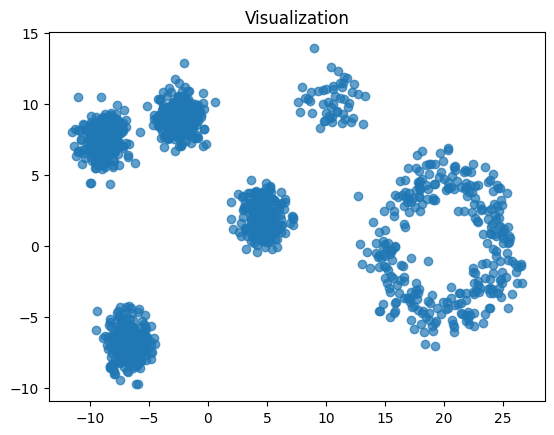

In [7]:
X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Visualization")
plt.show()

Imports

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [8]:
best_kmeans_n_clusters, best_kmeans_score = 15, -1

for n_clusters in range(2, 16):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=20, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)

    print(f"n_clusters = {n_clusters}, silhouette_score = {silhouette_avg:.4f}")

    if silhouette_avg > best_kmeans_score:
        best_kmeans_score, best_kmeans_n_clusters = silhouette_avg, n_clusters

print(f"Best number of clusters: {best_kmeans_n_clusters} with silhouette score: {best_kmeans_score:.4f}")

best_kmeans = KMeans(n_clusters=best_kmeans_n_clusters, random_state=42)
kmeans_labels = best_kmeans.fit_predict(X)


n_clusters = 2, silhouette_score = 0.5673
n_clusters = 3, silhouette_score = 0.5858
n_clusters = 4, silhouette_score = 0.6813
n_clusters = 5, silhouette_score = 0.6976
n_clusters = 6, silhouette_score = 0.7251
n_clusters = 7, silhouette_score = 0.7029
n_clusters = 8, silhouette_score = 0.7163
n_clusters = 9, silhouette_score = 0.7161
n_clusters = 10, silhouette_score = 0.7126
n_clusters = 11, silhouette_score = 0.6100
n_clusters = 12, silhouette_score = 0.7064
n_clusters = 13, silhouette_score = 0.5185
n_clusters = 14, silhouette_score = 0.4352
n_clusters = 15, silhouette_score = 0.4650
Best number of clusters: 6 with silhouette score: 0.7251


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [13]:
from itertools import product

linkages = ["ward", "complete", "average"]
metrics = ["euclidean", "manhattan", "cosine", "chebyshev", "minkowski"]
best_score, best_config = -1, None

for n_clusters, linkage, metric in product(range(2, 20), linkages, metrics):
    if linkage == "ward" and metric != "euclidean":
        continue

    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Clusters={n_clusters}, ({linkage},{metric})-> {score:.4f}")
    if score > best_score:
        best_score = score
        best_config = (n_clusters, linkage, metric, model)

best_n_clusters, best_linkage, best_metric, best_model = best_config

print(f"Best:\nClusters={best_n_clusters}, Linkage={best_linkage}, Metric={best_metric}, Silhouette Score={best_score:.4f}")

Clusters=2, (ward,euclidean)-> 0.5698
Clusters=2, (complete,euclidean)-> 0.5090
Clusters=2, (complete,manhattan)-> 0.5090
Clusters=2, (complete,cosine)-> 0.5090
Clusters=2, (complete,chebyshev)-> 0.5090
Clusters=2, (complete,minkowski)-> 0.5090
Clusters=2, (average,euclidean)-> 0.5698
Clusters=2, (average,manhattan)-> 0.5698
Clusters=2, (average,cosine)-> 0.5090
Clusters=2, (average,chebyshev)-> 0.5698
Clusters=2, (average,minkowski)-> 0.5698
Clusters=3, (ward,euclidean)-> 0.5806
Clusters=3, (complete,euclidean)-> 0.4730
Clusters=3, (complete,manhattan)-> 0.4730
Clusters=3, (complete,cosine)-> 0.6109
Clusters=3, (complete,chebyshev)-> 0.4730
Clusters=3, (complete,minkowski)-> 0.4730
Clusters=3, (average,euclidean)-> 0.5806
Clusters=3, (average,manhattan)-> 0.5806
Clusters=3, (average,cosine)-> 0.6109
Clusters=3, (average,chebyshev)-> 0.5806
Clusters=3, (average,minkowski)-> 0.5806
Clusters=4, (ward,euclidean)-> 0.6813
Clusters=4, (complete,euclidean)-> 0.6813
Clusters=4, (complete,manh

5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X_scaled = StandardScaler().fit_transform(X)

eps_values = [0.1, 0.5, 1.4, 1.5, 2.0]
min_samples_values = [3, 5, 7, 10]

best_params = {"eps": None, "min_samples": None, "score": -1, "n_clusters": None}
print("DBSCAN Parameter Testing Results:")

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        n_clusters = len(set(labels) - {-1})
        score = silhouette_score(X, labels) if n_clusters > 1 else -1
        print(f"eps={eps}, min_samples={min_samples} → n_clusters={n_clusters}, silhouette_score={score:.4f}")

        if score > best_params["score"]:
            best_params.update({"eps": eps, "min_samples": min_samples, "score": score, "n_clusters": n_clusters})

print(f"\nBest DBSCAN Parameters Based on Silhouette Score:\neps = {best_params['eps']}, min_samples = {best_params['min_samples']}, Best silhouette score = {best_params['score']:.4f}, Best number of clusters = {best_params['n_clusters']}")
best_dbscan = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"])
best_labels = best_dbscan.fit_predict(X)

DBSCAN Parameter Testing Results:
eps=0.1, min_samples=3 → n_clusters=59, silhouette_score=-0.4614
eps=0.1, min_samples=5 → n_clusters=10, silhouette_score=-0.6773
eps=0.1, min_samples=7 → n_clusters=0, silhouette_score=-1.0000
eps=0.1, min_samples=10 → n_clusters=0, silhouette_score=-1.0000
eps=0.5, min_samples=3 → n_clusters=45, silhouette_score=0.3488
eps=0.5, min_samples=5 → n_clusters=23, silhouette_score=0.2887
eps=0.5, min_samples=7 → n_clusters=8, silhouette_score=0.3358
eps=0.5, min_samples=10 → n_clusters=4, silhouette_score=0.4491
eps=1.4, min_samples=3 → n_clusters=5, silhouette_score=0.6888
eps=1.4, min_samples=5 → n_clusters=5, silhouette_score=0.6888
eps=1.4, min_samples=7 → n_clusters=6, silhouette_score=0.7223
eps=1.4, min_samples=10 → n_clusters=6, silhouette_score=0.7213
eps=1.5, min_samples=3 → n_clusters=5, silhouette_score=0.6894
eps=1.5, min_samples=5 → n_clusters=5, silhouette_score=0.6894
eps=1.5, min_samples=7 → n_clusters=5, silhouette_score=0.6888
eps=1.5, m

6. Compare the results and choose the best method for the data


In [20]:
print(f"KMeans:\n{'-'*17}\nKMeans clusters: {best_kmeans_n_clusters}\nSilhouette score: {best_kmeans_score}\n{'-'*17}\n")
print(f"Agglomerative Clustering:\n{'-'*25}\nBest number of clusters: {best_n_clusters}\nBest silhouette score: {best_score}\n{'-'*25}\n")
print(f"DBSCAN:\n{'-'*12}\nDBSCAN clusters: {best_params['n_clusters']}\nSilhouette score: {best_params['score']:.4f}\n{'-'*12}")

scores = {
    "KMeans": best_kmeans_score,
    "Agglomerative": best_score,
    "DBSCAN": best_params['score']
}

best_method = max(scores, key=scores.get)
print(f"\n=> Best clustering method: {best_method}")

KMeans:
-----------------
KMeans clusters: 6
Silhouette score: 0.7251181630059241
-----------------

Agglomerative Clustering:
-------------------------
Best number of clusters: 6
Best silhouette score: 0.7256900714288006
-------------------------

DBSCAN:
------------
DBSCAN clusters: 6
Silhouette score: 0.7223
------------

=> Best clustering method: Agglomerative
